In [ ]:
l=[]
while(1):
  l.append("12")

http://marubon-ds.blogspot.com/2018/03/some-fine-tuning-models-with-keras.html

In [ ]:
# USAGE
# python train.py

# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
import keras
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16,Xception
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from sklearn.metrics import classification_report
#from pyimagesearch import config
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

TRAIN_Dir = "/content/drive/My Drive/Data/MDM/train"
TEST_Dir = "/content/drive/My Drive/Data/MDM/test"
VAL_Dir = "/content/drive/My Drive/Data/MDM/test"

# initialize the list of class label names
#CLASSES=['Boondi Raita', 'Boiled Egg', 'Chana Lauki Dal', 'Bhindi', 'Banana', 'Chai', 'Chana Dal', 'Chana Dal Chawal', 'Boiled Plain Rice', 'Besan Kadi', 'Kadi Chawal', 'Chole', 'Kheera Salad', 'Dahi', 'Khichi Urad Dal', 'Dal Palak', 'Kale Chane', 'Kheera Raita', 'Chole Chawal', 'Khichdi Moong Dal', 'Rajma', 'Patta Gobi', 'Lauki', 'Moong Masoor Ki Dal', 'Mooli Ki Sabzi', 'Milk', 'Lobia Dal', 'Lassi', 'Masoor Dal', 'Orange', 'Urad Ki Dal', 'Aloo Gobhi', 'Aloo Gajar Mutter', 'Roti', 'Saag', 'Ramdana', 'Rajma Chawal', 'Water', 'Aloo Baingan', 'Aloo Methi', 'Aloo Mutter', 'Aloo Nutri', 'Amrood', 'Aloo Shimla Mirch', 'Aloo Sabzi', 'Apple']
CLASSES=['Aloo Baingan','Aloo Gajar Mutter','Aloo Gobhi','Aloo Methi','Aloo Mutter','Aloo Nutri','Aloo Sabzi','Aloo Shimla Mirch','Amrood','Apple','Banana','Besan Kadi','Bhindi','Boiled Egg','Boiled Plain Rice','Boondi Raita','Chai','Chana Dal','Chana Dal Chawal','Chana Lauki Dal','Chole','Chole Chawal','Dahi','Dal Palak','Kadi Chawal','Kale Chane','Kheera Raita','Kheera Salad','Khichdi Moong Dal','Khichi Urad Dal','Lassi','Lauki','Lobia Dal','Masoor Dal','Milk','Mooli Ki Sabzi','Moong Masoor Ki Dal','Orange','Patta Gobi','Rajma','Rajma Chawal','Ramdana','Roti','Saag','Urad Ki Dal','Water']
# set the batch size when fine-tuning
BATCH_SIZE = 32

# initialize the output directory to
# where the extracted features (in CSV file format) will be stored
# set the path to the serialized model after training
VGG16_NetHead_MODEL_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/VGG16/VGG16_NetHead.h5"
Xception_NetHead_MODEL_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/Xception/Xception_NetHead.h5"
InceptionV3_NetHead_MODEL_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/InceptionV3/InceptionV3_NetHead.h5"
ResNet50_NetHead_MODEL_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/ResNet50/ResNet50_NetHead.h5"


VGG16_NetComplete_MODEL_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/VGG16/VGG16_NetComplete.h5"
Xception_NetComplete_MODEL_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/Xception/Xception_NetComplete.h5"
InceptionV3_NetComplete_MODEL_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/InceptionV3/InceptionV3_NetComplete.h5"
ResNet50_NetComplete_MODEL_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/ResNet50/ResNet50_NetComplete.h5"

# define the path to the output training history plots
#UNFROZEN_PLOT_PATH = os.path.sep.join(["output", "unfrozen.png"])
VGG16_UNFROZEN_PLOT_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/VGG16/VGG16_unfrozen.png"
Xception_UNFROZEN_PLOT_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/Xception/Xception_unfrozen.png"
InceptionV3_UNFROZEN_PLOT_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/InceptionV3/InceptionV3_unfrozen.png"
ResNet50_UNFROZEN_PLOT_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/ResNet50/ResNet50_unfrozen.png"
#WARMUP_PLOT_PATH = os.path.sep.join(["output", "warmup.png"])
VGG16_WARMUP_PLOT_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/VGG16/VGG16_warmup.png"
Xception_WARMUP_PLOT_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/Xception/Xception_warmup.png"
InceptionV3_WARMUP_PLOT_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/InceptionV3/InceptionV3_warmup.png"
ResNet50_WARMUP_PLOT_PATH="/content/drive/My Drive/IMG_Classification/Fine_tune_keras_all/ResNet50/ResNet50_warmup.png"

In [ ]:
import os
classs_list=[]
for x in os.listdir(TRAIN_Dir):
    classs_list.append(x)
print(classs_list)
print(len(classs_list))

['Urad Ki Dal', 'Apple', 'Aloo Shimla Mirch', 'Masoor Dal', 'Lassi', 'Milk', 'Lobia Dal', 'Aloo Sabzi', 'Aloo Gobhi', 'Orange', 'Roti', 'Saag', 'Ramdana', 'Rajma Chawal', 'Water', 'Aloo Baingan', 'Aloo Methi', 'Aloo Mutter', 'Aloo Nutri', 'Amrood', 'Moong Masoor Ki Dal', 'Lauki', 'Chai', 'Chole Chawal', 'Chana Dal Chawal', 'Chana Dal', 'Khichi Urad Dal', 'Dal Palak', 'Kale Chane', 'Boiled Plain Rice', 'Khichdi Moong Dal', 'Kheera Raita', 'Kadi Chawal', 'Patta Gobi', 'Chole', 'Besan Kadi', 'Rajma', 'Kheera Salad', 'Aloo Gajar Mutter', 'Mooli Ki Sabzi', 'Boiled Egg', 'Dahi', 'Boondi Raita', 'Bhindi', 'Banana', 'Chana Lauki Dal']
46


In [ ]:
# derive the paths to the training, validation, and testing
# directories
"""
trainPath = os.path.sep.join([config.BASE_PATH, config.TRAIN])
valPath = os.path.sep.join([config.BASE_PATH, config.VAL])
testPath = os.path.sep.join([config.BASE_PATH, config.TEST])
"""
trainPath = TRAIN_Dir
valPath = TEST_Dir
testPath = TEST_Dir

# determine the total number of image paths in training, validation,
# and testing directories
totalTrain = len(list(paths.list_images(trainPath)))
totalVal = len(list(paths.list_images(valPath)))
totalTest = len(list(paths.list_images(testPath)))
print("totalTrain:",totalTrain)
print("totalVal:",totalVal)
print("totalTest:",totalTest)

# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

totalTrain: 2133
totalVal: 2297
totalTest: 2297


In [ ]:

def model_fine_tune(train_type,train_round,HEAD_MODEL_PATH,COMPLETE_MODEL_PATH,target_size,baseModel,CLI_start,epochs):
    #========================================================
    # initialize the training generator
    trainGen = trainAug.flow_from_directory(
      trainPath,
      class_mode="categorical",
      target_size=target_size,
      color_mode="rgb",
      shuffle=True,
      batch_size=BATCH_SIZE)

    # initialize the validation generator
    valGen = valAug.flow_from_directory(
      valPath,
      class_mode="categorical",
      target_size=target_size,
      color_mode="rgb",
      shuffle=False,
      batch_size=BATCH_SIZE)

    # initialize the testing generator
    testGen = valAug.flow_from_directory(
      testPath,
      class_mode="categorical",
      target_size=target_size,
      color_mode="rgb",
      shuffle=False,
      batch_size=BATCH_SIZE)
    # load the VGG16 network, ensuring the head FC layer sets are left
    # off
    #=========================================================
    if train_type=="HEAD":
      if train_round==1:
        baseModel =baseModel
        # construct the head of the model that will be placed on top of the
        # the base model
        headModel = baseModel.output
        headModel = Flatten(name="flatten")(headModel)
        headModel = Dense(512, activation="relu")(headModel)
        headModel = Dropout(0.5)(headModel)
        headModel = Dense(len(CLASSES), activation="softmax")(headModel)
        # place the head FC model on top of the base model (this will become
        # the actual model we will train)
        model = Model(inputs=baseModel.input, outputs=headModel)
        # train the head of the network for a few epochs (all other layers
        # are frozen) -- this will allow the new FC layers to start to become
        # initialized with actual "learned" values versus pure random
        print("[INFO] training head round1...")
        #===========================================================
        # loop over all layers in the base model and freeze them so they will
        # *not* be updated during the first training process
        for layer in baseModel.layers:
          layer.trainable = False
        # loop over the layers in the model and show which ones are trainable
        # or not
        for layer in model.layers:
          print("{}:: {}: {}".format(layer.name, layer, layer.trainable))
        outputmodelpath =HEAD_MODEL_PATH
      elif train_round==2:
        inputmodelpath =HEAD_MODEL_PATH
        model = load_model(inputmodelpath) #INPUT PATH
        #for layer in model.layers[19:]:
        #  layer.trainable = True
        print("[INFO] training head round2...")
        for layer in model.layers:
          print("{}:: {}: {}".format(layer.name, layer, layer.trainable))
        outputmodelpath =HEAD_MODEL_PATH
    elif train_type=="COMPLETE":
      if train_round==1:
        inputmodelpath=HEAD_MODEL_PATH
        model = load_model(inputmodelpath) #INPUT PATH
        #====================================================================
        # reset our data generators
        trainGen.reset()
        valGen.reset()
        # now that the head FC layers have been trained/initialized, lets
        # unfreeze the final set of CONV layers and make them trainable

        for layer in model.layers[CLI_start:]:
          layer.trainable = True
        # loop over the layers in the model and show which ones are trainable
        # or not
        for layer in model.layers:
          print("{}:: {}: {}".format(layer.name, layer, layer.trainable))
        print("[INFO] training complete round1...")
        outputmodelpath =COMPLETE_MODEL_PATH

      elif train_round==2:
        inputmodelpath=COMPLETE_MODEL_PATH
        model = load_model(inputmodelpath) #INPUT PATH
        #for layer in model.layers[19:]:
        #  layer.trainable = True
        print("[INFO] training complete round2...")
        for layer in model.layers:
          print("{}:: {}: {}".format(layer.name, layer, layer.trainable))
        outputmodelpath =COMPLETE_MODEL_PATH
      elif train_round==3:
        inputmodelpath=COMPLETE_MODEL_PATH
        model = load_model(inputmodelpath) #INPUT PATH
        #====================================================================
        # reset our data generators
        trainGen.reset()
        valGen.reset()
        # now that the head FC layers have been trained/initialized, lets
        # unfreeze the final set of CONV layers and make them trainable

        for layer in model.layers:
          layer.trainable = True
        # loop over the layers in the model and show which ones are trainable
        # or not
        for layer in model.layers:
          print("{}:: {}: {}".format(layer.name, layer, layer.trainable))
        print("[INFO] training complete round1...")
        outputmodelpath =COMPLETE_MODEL_PATH

    #==========================================================
    # compile our model (this needs to be done after our setting our
    # layers to being non-trainable
    print("[INFO] compiling model...")
    opt = SGD(lr=1e-4, momentum=0.9)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
      metrics=["accuracy"])

    #modelpath =NetHead_MODEL_PATH #"/content/drive/My Drive/Data/MDM/vgg16_46labels1.h5"NetHead_MODEL_PATH
    sv_callback = keras.callbacks.ModelCheckpoint(outputmodelpath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto',period=1)

    history = model.fit_generator(
      trainGen,
      steps_per_epoch=totalTrain // BATCH_SIZE,
      validation_data=valGen,
      validation_steps=totalVal // BATCH_SIZE,
      verbose=1,
      callbacks = [sv_callback],
      epochs=epochs)
    return history,testGen


In [ ]:
# vgg16
train_type="COMPLETE"  #"HEAD","COMPLETE"
train_round=3 #"1" for base training for first time,"2" for retraining
HEAD_MODEL_PATH=VGG16_NetHead_MODEL_PATH #for first time "COMPLETE" training
COMPLETE_MODEL_PATH=VGG16_NetComplete_MODEL_PATH

target_size=(224, 224)
input_tensor=Input(shape=(224, 224, 3))
CLI_start=15
epochs=50
baseModel = VGG16(weights="imagenet", include_top=False,
          input_tensor=input_tensor)

history,testGen=model_fine_tune(train_type,train_round,HEAD_MODEL_PATH,COMPLETE_MODEL_PATH,target_size,baseModel,CLI_start,epochs)






58892288/58889256 [==============================] - 2s 0us/step








NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:

def plot_training(H, N, plotPath):
	# construct a plot that plots and saves the training history
	plt.style.use("ggplot")
	plt.figure()
	plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
	plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
	plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
	plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
	plt.title("Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")
	plt.savefig(plotPath)

In [ ]:
# reset the testing generator and then use our trained model to
# make predictions on the data
print("[INFO] evaluating after fine-tuning network...")
testGen.reset()
predIdxs = model.predict_generator(testGen,
	steps=(totalTest // config.BATCH_SIZE) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys()))
plot_training(H, 20, config.UNFROZEN_PLOT_PATH)

# serialize the model to disk
print("[INFO] serializing network...")
model.save(MODEL_PATH)

In [ ]:

# import the necessary packages
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

# load the trained model from disk
print("[INFO] loading model...")
MODEL_PATH=VGG16_NetComplete_MODEL_PATH
model = load_model(MODEL_PATH)

[INFO] loading model...


In [ ]:
# load the input image and then clone it so we can draw on it later
tst_path="/content/drive/My Drive/Data/MDM/test/Rajma/22 (81).jpg"
image = cv2.imread(tst_path)
output = image.copy()
output = imutils.resize(output, width=400)

# our model was trained on RGB ordered images but OpenCV represents
# images in BGR order, so swap the channels, and then resize to
# 224x224 (the input dimensions for VGG16)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))

# convert the image to a floating point data type and perform mean
# subtraction
image = image.astype("float32")
mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
image -= mean

# pass the image through the network to obtain our predictions
preds = model.predict(np.expand_dims(image, axis=0))[0]
print(preds)
i = np.argmax(preds)
label = CLASSES[i]
# draw the prediction on the output image
text = "{}: {:.2f}%".format(label, preds[i] * 100)
print(text)

[3.8744778e-15 9.8087263e-19 3.8271422e-18 5.4609833e-26 2.6203603e-17
 3.9289691e-10 1.4254998e-13 8.2209057e-23 5.9163650e-26 1.0285790e-22
 2.5075503e-23 3.6371025e-20 2.3377522e-20 4.6941505e-22 2.4012682e-25
 2.8431428e-21 8.5046549e-20 1.9304852e-14 4.9006083e-20 3.5939566e-15
 7.3515555e-11 9.7985728e-15 2.2107610e-24 1.5018014e-21 8.7220290e-27
 2.5560331e-07 1.0004053e-26 1.8026611e-20 8.7518051e-24 1.0420195e-20
 2.0088708e-24 4.8784548e-18 6.7933746e-07 1.9081774e-13 4.0552697e-27
 7.0111068e-18 8.3624724e-17 3.7011495e-20 1.1784160e-24 9.9999869e-01
 3.1681068e-07 5.2356145e-18 4.7376052e-25 2.5421279e-22 7.8058555e-09
 9.5572167e-22]
Rajma: 100.00%


In [ ]:
!pip freeze


absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.0.1
asgiref==3.2.3
astor==0.8.1
astropy==4.0
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.4.0
boto==2.49.0
boto3==1.11.15
botocore==1.14.15
Bottleneck==1.3.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.11.28
cffi==1.14.0
chainer==6.5.0
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
cloudpickle==1.2.2
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.0
cvxopt==1.2.4
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.3
Cython==0.29.15
daft==0.0.4
dask==2.9.2
dataclasses==0.7
datascience==0.10.6
decorator==4.4.1
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0.3
dlib==19.18.0
dm-sonnet==1.35
docopt==0.6.2
docu

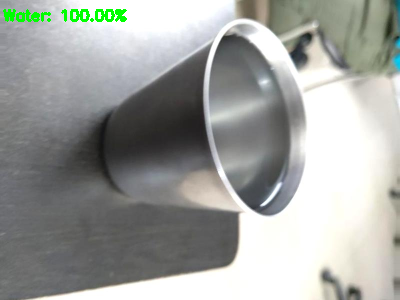

In [ ]:
cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
	(0, 255, 0), 2)

# show the output image
cv2_imshow( output)